## Lab Assignment: Exploratory Data Analysis
Student:     **Omar De La Rosa**

### Objective: To gain an understanding of exploratory data analysis (EDA) techniques and their application using Pandas, Pandas Profiling, and Matplotlib.

### Instructions:

1. Load the dataset titanic.csv using Pandas and display the first 5 rows.
2. Calculate the summary statistics of the dataset and display them.
3. Visualize the distribution of the target variable using a bar chart.
4. Visualize the distribution of the target variable by class using a stacked bar chart.
5. Plot a histogram to visualize the distribution of age.
6. Create a scatter plot to visualize the relationship between age and fare.
7. Use Pandas profiling to generate a detailed report of the dataset.
8. Identify and visualize any missing values in the dataset.
9. Identify and visualize any outliers in the dataset.
10. Identify and visualize any correlations between variables in the dataset.

### Deliverable:
Modify this notebook to include the python code as well as any documentation related to your submission.  Submit the notebook as your response in Blackboard.

### Grading Criteria:

Your lab assignment will be graded based on the following criteria:

- Correctness of the implementation
- Proper use of basic control structures and functions
- Code efficiency
- Clarity and readability of the code
- Compliance with the instructions and deliverables.

### Dataset
The dataset to be used for this lab assignment is the Titanic dataset, which contains information about passengers on the Titanic, including their demographics, ticket information, and survival status. The dataset can be downloaded from Kaggle: https://www.kaggle.com/c/titanic/data

You can load the dataset using the following code:

Loading the Titanic Dataset

In [17]:
import seaborn as sns

# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')
titanic.count()


survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

Student Submission:

1.) Load the dataset titanic.csv using Pandas and display the first 5 rows.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


2.) Calculate the summary statistics of the dataset and display them.

In [19]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


3.) Visualize the distribution of the target variable using a bar chart.

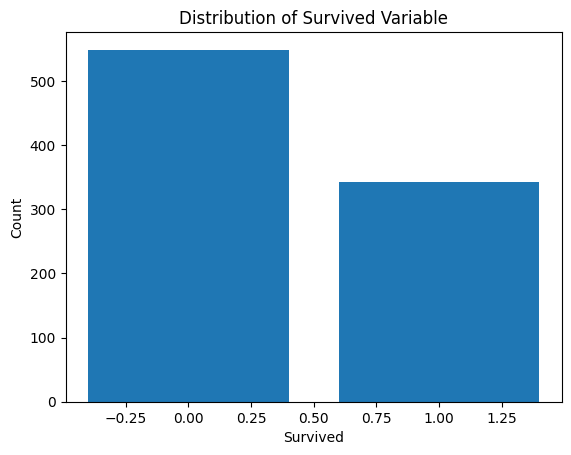

In [20]:
target_counts = df['Survived'].value_counts()
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survived Variable')
plt.show()

4.) Visualize the distribution of the target variable by class using a stacked bar chart.

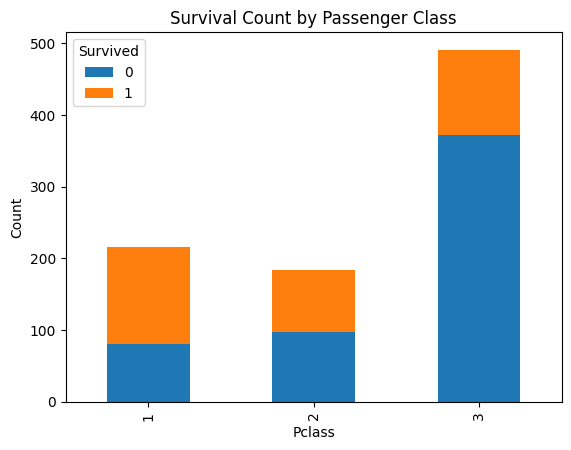

In [21]:
class_survived_counts = pd.crosstab(df['Pclass'], df['Survived'])
class_survived_counts.plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.show()

5.) Plot a histogram to visualize the distribution of age.

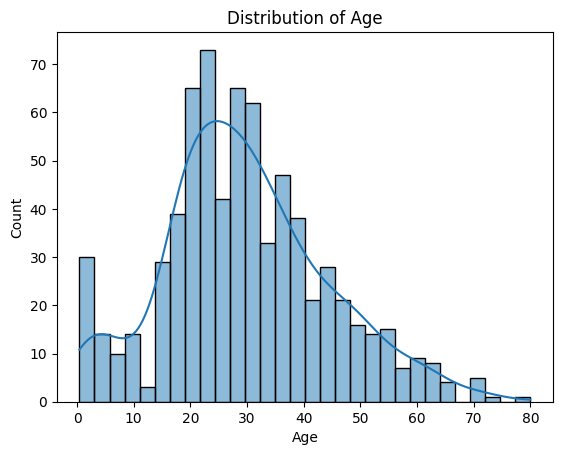

In [22]:
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

6.) Create a scatter plot to visualize the relationship between age and fare.

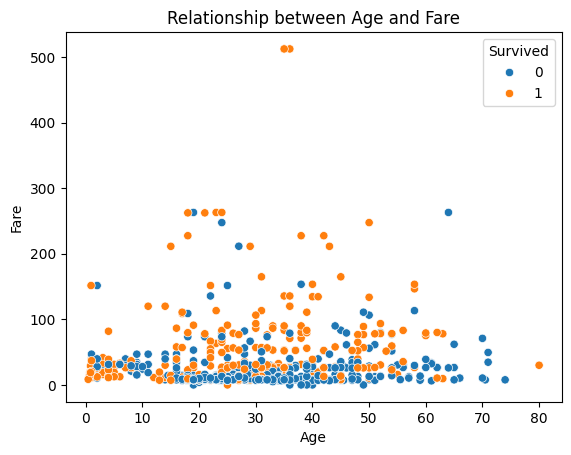

In [23]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

7.) Use Pandas profiling to generate a detailed report of the dataset.

In [42]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Titanic Dataset Profiling Report', explorative=True)
profile.to_file('titanic_report.html')



ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.1.

8.) Identify and visualize any missing values in the dataset.

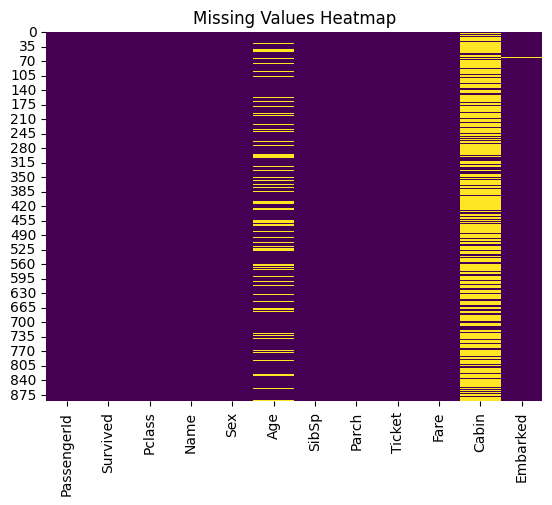

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [39]:
missing_values = df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
print(missing_values)

9.) Identify and visualize any outliers in the dataset.

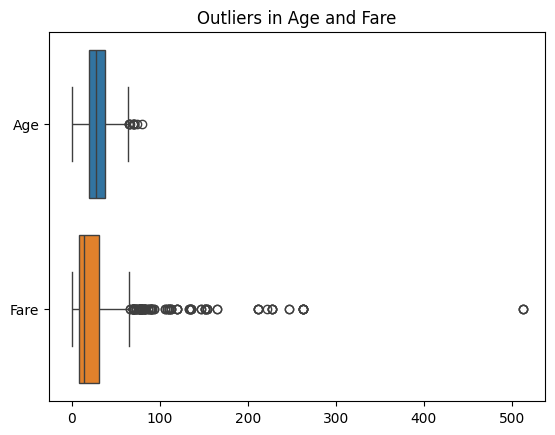

In [40]:
sns.boxplot(data=df[['Age', 'Fare']], orient='h')
plt.title('Outliers in Age and Fare')
plt.show()

10.) Identify and visualize any correlations between variables in the dataset.

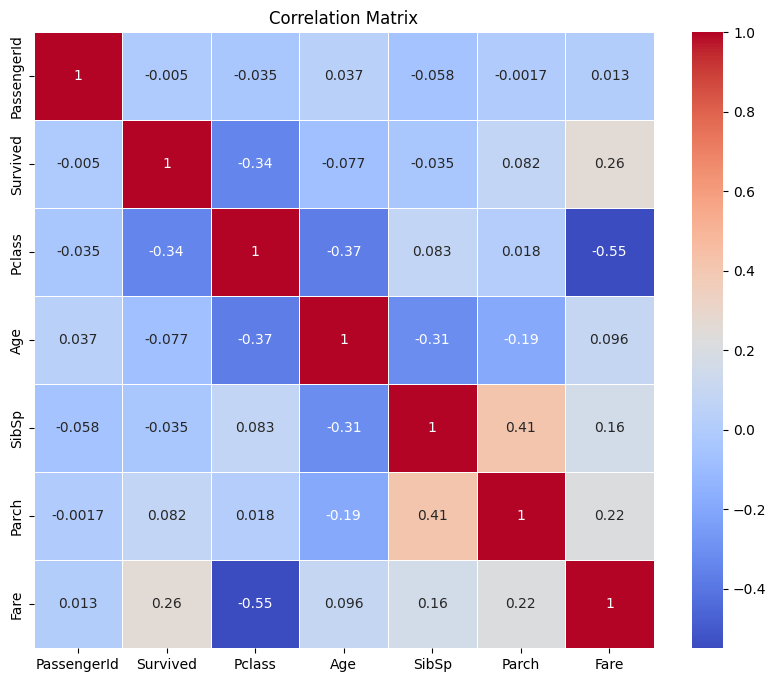

In [43]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()